In [13]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/wzhang/Downloads/Agriculture Data.xlsx - Sheet1 (1).csv')

X = pd.DataFrame(dataset.iloc[:,0:11].values)
Y = pd.DataFrame(dataset.iloc[:,11:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

features = pd.DataFrame(dataset.iloc[:,0:11])
features = features.columns
print(features)

      0   1   2   3   4   5   6   7   8   9   10
0      3   2   2  25  26   9   0   0   0   0   0
1      3   3   1  61  17   9   0   0   0   0   0
2      3   3   1  65  16   9   0   0   0   0   0
3      3   2   1  49  17   9   0   0   0   1   0
4      3   1   1  59  28   9   0   0   0   0   0
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
2416   1   1   1  50  25   9   0   0   0   0   0
2417   1   2   1  58  49   8   0   0   0   0   0
2418   1   2   1   3  36   9   0   0   0   0   0
2419   3   2   2  48  40   9   0   0   0   0   0
2420   1   1   1  81  37   7   0   0   0   0   0

[2421 rows x 11 columns]
      0
0     0
1     1
2     1
3     0
4     1
...  ..
2416  1
2417  0
2418  1
2419  0
2420  1

[2421 rows x 1 columns]
(1936, 11)
(1936, 1)
Index(['Location of Incident', 'Time', 'Sex', 'Age', 'State', 'Injury Agent ',
       'Confined Space', 'Grain Involved', 'Alcohol/Drugs', 'Seatbelt',
       'Helmet'],
      dtype='object')


In [14]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from deepforest import CascadeForestClassifier 

In [15]:
from bayes_opt import BayesianOptimization, UtilityFunction
import warnings
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
def objective(n_estimators, n_trees,max_layers):
    model = CascadeForestClassifier(n_estimators = int(n_estimators),
                                  n_trees= int(n_trees),
                                  max_layers= (max_layers))

    return cross_val_score(model, X_train, Y_train, cv=10,scoring = 'roc_auc').mean()
param_bounds = {
    'n_estimators': (1, 200),
    'n_trees': (1,500),
    'max_layers': (1,20)
}
optimizer = BayesianOptimization(f=objective, pbounds=param_bounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=5)
best_params = optimizer.max['params']

|   iter    |  target   | max_la... | n_esti... |  n_trees  |
-------------------------------------------------------------
[2024-07-24 20:49:02.351] Start to fit the model:
[2024-07-24 20:49:02.351] Fitting cascade layer = 0 


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [ ]:
model = CascadeForestClassifier(n_estimators=int(best_params['n_estimators']),n_trees = int(best_params['n_trees']),max_layers= int(best_params['max_layers']))
model.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2024-07-22 19:23:59.624] Start to fit the model:
[2024-07-22 19:23:59.624] Fitting cascade layer = 0 
[2024-07-22 19:24:04.064] layer = 0  | Val Acc = 63.791 % | Elapsed = 4.440 s
[2024-07-22 19:24:04.089] Fitting cascade layer = 1 
[2024-07-22 19:24:13.088] layer = 1  | Val Acc = 68.802 % | Elapsed = 8.999 s
[2024-07-22 19:24:13.120] Fitting cascade layer = 2 
[2024-07-22 19:24:21.268] layer = 2  | Val Acc = 68.698 % | Elapsed = 8.147 s
[2024-07-22 19:24:21.268] Early stopping counter: 1 out of 2
[2024-07-22 19:24:21.293] Fitting cascade layer = 3 
[2024-07-22 19:24:29.579] layer = 3  | Val Acc = 68.182 % | Elapsed = 8.286 s
[2024-07-22 19:24:29.579] Early stopping counter: 2 out of 2
[2024-07-22 19:24:29.579] Handling early stopping
[2024-07-22 19:24:29.585] The optimal number of layers: 2


In [16]:
model = CascadeForestClassifier(n_estimators=10)
model.fit(X_train,Y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2024-07-24 20:49:12.472] Start to fit the model:
[2024-07-24 20:49:12.472] Fitting cascade layer = 0 
[2024-07-24 20:49:21.359] layer = 0  | Val Acc = 64.411 % | Elapsed = 8.887 s
[2024-07-24 20:49:21.440] Fitting cascade layer = 1 
[2024-07-24 20:49:39.287] layer = 1  | Val Acc = 70.248 % | Elapsed = 17.847 s
[2024-07-24 20:49:39.356] Fitting cascade layer = 2 
[2024-07-24 20:49:56.338] layer = 2  | Val Acc = 70.506 % | Elapsed = 16.982 s
[2024-07-24 20:49:56.397] Fitting cascade layer = 3 
[2024-07-24 20:50:14.662] layer = 3  | Val Acc = 70.300 % | Elapsed = 18.265 s
[2024-07-24 20:50:14.663] Early stopping counter: 1 out of 2
[2024-07-24 20:50:14.705] Fitting cascade layer = 4 
[2024-07-24 20:50:31.218] layer = 4  | Val Acc = 70.610 % | Elapsed = 16.512 s
[2024-07-24 20:50:31.268] Fitting cascade layer = 5 
[2024-07-24 20:50:46.054] layer = 5  | Val Acc = 69.783 % | Elapsed = 14.785 s
[2024-07-24 20:50:46.054] Early stopping counter: 1 out of 2
[2024-07-24 20:50:46.113] Fitting cas

In [17]:
res = model.predict(X_test)
print(res)
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

[2024-07-24 20:51:04.050] Start to evalute the model:
[2024-07-24 20:51:04.051] Evaluating cascade layer = 0 
[2024-07-24 20:51:04.373] Evaluating cascade layer = 1 
[2024-07-24 20:51:04.696] Evaluating cascade layer = 2 
[2024-07-24 20:51:04.965] Evaluating cascade layer = 3 
[2024-07-24 20:51:05.322] Evaluating cascade layer = 4 
[1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

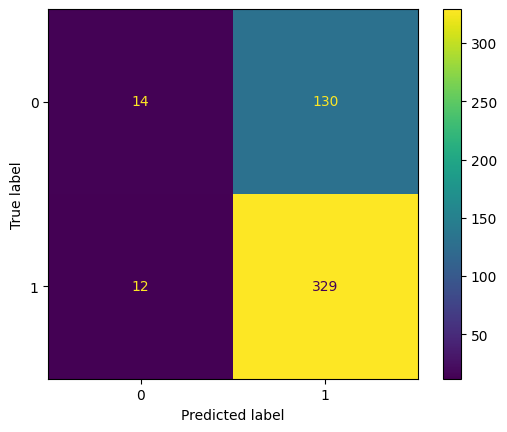

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, res)
cm_display = ConfusionMatrixDisplay(confusionmatrix, display_labels=[0,1])
cm_display.plot()